<a href="https://colab.research.google.com/github/EsabellB15/ABSENTEEISM-AT-WORK/blob/main/Sales_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Analytics Project


## Load and Preview the Data

Dataset - [link](https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/)

In [1]:
# Loading relevant libraries and data
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv('shopping_trends_updated.csv')
# Previewing the top of the dataset
sales.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# Previewing the bottom of the dataset
sales.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [5]:
# Checking the dataset shape
sales.shape

(3900, 18)

## Cleaning the Data

In [6]:
# Checking the data type
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [8]:
# Checkign for missing values
sales.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [10]:
# Checking for duplicate values
sales.duplicated().sum()

0

## Data Exploration and Visualization

In [11]:
# Summary of the Data
sales.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [14]:
#Q1. Print out, then visualize the most popular payment method.
sales.groupby('Payment Method')['Payment Method'].count().sort_values(ascending =False).head(1)

Payment Method
PayPal    677
Name: Payment Method, dtype: int64

<Axes: xlabel='count', ylabel='Payment Method'>

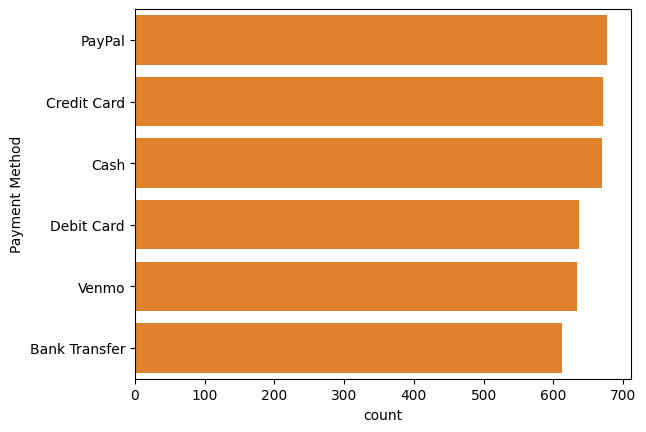

In [21]:
# Viz
base_color = sb.color_palette()[1]

method = sales['Payment Method'].value_counts().index

#method
sb.countplot(data=sales, y= 'Payment Method',  color=base_color, order=method)

In [31]:
#Q2. Print out, then visualize the most popular item purchased.
sales.groupby('Item Purchased')['Item Purchased'].count().sort_values(ascending=False).head(5)

Item Purchased
Jewelry    171
Blouse     171
Pants      171
Shirt      169
Dress      166
Name: Item Purchased, dtype: int64

<Axes: xlabel='count', ylabel='Item Purchased'>

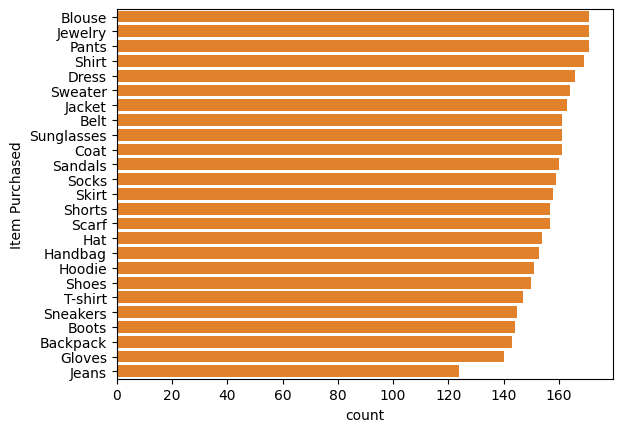

In [34]:
#Viz of the most popular item purchased
Item_Purchased = sales['Item Purchased'].value_counts().index

sb.countplot(data=sales, y='Item Purchased',  color= base_color, order=Item_Purchased)

In [24]:
# Print out the most popular item purchased by females

sales[(sales['Gender']=='Female')].groupby('Item Purchased')['Item Purchased'].count().sort_values(ascending=False).head(1)

Item Purchased
Blouse    66
Name: Item Purchased, dtype: int64

<Axes: xlabel='count', ylabel='Location'>

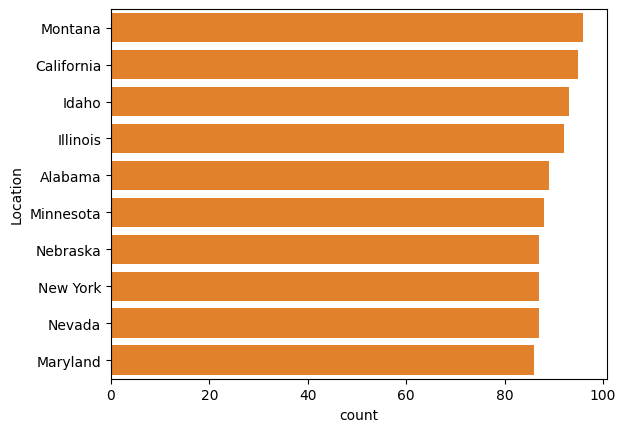

In [26]:
#Q4. Visualize the locations that drive majority of the sales

Location = sales['Location'].value_counts().head(10).index

#method
sb.countplot(data=sales, y='Location',  color= base_color, order=Location)

In [29]:
#Q5. On average how much do customers spend
mean_purchases = round(sales['Purchase Amount (USD)'].mean(),2)
median_purchases = round(sales['Purchase Amount (USD)'].median(),2)

print('Mean ='+str(mean_purchases))
print('Median = '+str(median_purchases))

Mean =59.76
Median = 60.0
